<h1><b>General Lagrange ODE</b></h1>

$$A(y')y(x) + B(y')x + C(y') = 0$$

Case $ A=0, B=0: C(y') = 0 => y' = root_C $

Case $ A=0, C=0: xB(y') = 0 => y'  = root_B $

Case $ B=0, C=0: yA(y') = 0 => y = 0 $ or $ y' = root_A $



In [1]:
import sympy as smp


def solve_lagrange(A, B, C):
    """
        Solves equation A(y')y(x) + B(y')x + C(y') = 0

        Uses parametrisation A(p)y + B(p)x + C(p) = 0 with dy = pdx

        Parameters

        A, B, C: functions of variable p
    """

    x, y, p, C1= smp.symbols('x y p C1')
    
    eq = smp.Eq(A*y + B*x + C, 0)
    print(f'Your equation: {eq}')

    if A == 0 and B == 0:
        y = smp.Function('y')
        roots = smp.solve(C, p)
        soln = [smp.Eq(y(x), root*x+C1) for root in roots]
        return soln

    elif A == 0 and C == 0:
        y = smp.Function('y')
        roots = smp.solve(B, p)
        soln = [smp.Eq(y(x), root*x+C1) for root in roots]
        return soln

    elif B == 0 and C == 0:
        y = smp.Function('y')
        roots = smp.solve(A, p)
        soln = [smp.Eq(y(x), root*x+C1) for root in roots]
        soln.insert(0, smp.Eq(y(x), 0))
        return soln

    elif A == 0:
        """
            No dependent variable y in the equation
            Can directly solve for x in terms of p
            Return parametric solution with parameter p
        """
        x = smp.Function('x')
        x = x(p)

        eq = x*B + C

        #check for zeros of B(p), p = y' and check if they solve the ODE
        roots = smp.solve(B, p)

        line_solutions = [smp.Symbol('x')*root + C1 for root in roots if eq.subs(p, root) == 0]

        x_of_p = smp.solve(eq, x)[0]
        """
            dy = p*dx <=> dy = p*dx/dp*dp => y = int[p*dx/dp]dp
        """
        y_of_p = smp.Integral(p*x_of_p.diff(p), p).doit() + C1

        y = smp.Function('y')
        return (smp.Eq(x, x_of_p), smp.Eq(y(p), y_of_p)), [smp.Eq(y('x'), line_solution) for line_solution in line_solutions]
        
    elif B == 0:
        """
            Equation does not contain x - independent variable
            Can express y in terms of p
            Return parametric solution with parameter p
        """
        x = smp.Function('x')
        
        x = x(p)

        eq = y*A + C

        #check for zeros of A(p), p = y' and check if they solve the ODE
        roots = smp.solve(A, p)
        line_solutions = [smp.Symbol('x')*root+C1 for root in roots if eq.subs(p, root) == 0]

        y_of_p = smp.solve(eq, y)[0]

        x_of_p = smp.Integral(1/p*y_of_p.diff(p), p).doit() + C1

        y = smp.Function('y')
        return (smp.Eq(x, x_of_p), smp.Eq(y(p), y_of_p)), [smp.Eq(y('x'), line_solution) for line_solution in line_solutions]
    
    else:
        x = smp.Function('x')
        x = x(p)

        eq = y*A + x*B + C

        #check for zeros of A(p), p = y' and check if they solve the ODE
        roots = smp.solve(A, p)
        line_solutions = [smp.Symbol('x')*root+C1 for root in roots if eq.subs(p, root) == 0]

        y_of_x_p = smp.solve(eq, y)[0]
        print(y_of_x_p)

        # Take the differential of `eq`
        derived_ode = (y_of_x_p*A.diff(p) + x*B.diff(p) + C.diff(p)) + x.diff(p)*(p*A+B)
        print(derived_ode)
        
        # check for zeros of expression
        roots = smp.solve(p*A+B, p)
        line_solutions_2 = [smp.Symbol('x')*root+C1 for root in roots if eq.subs(p, root) == 0]

        x_of_p = smp.dsolve(derived_ode, x)
        print(x_of_p)

        y_of_p = y_of_x_p.subs(x, x_of_p.rhs)
        
        y = smp.Function('y')
        return (smp.Eq(x, x_of_p.rhs), smp.Eq(y(p), y_of_p)), [smp.Eq(y('x'), line_solution) for line_solution in line_solutions + line_solutions_2]
    

p= smp.symbols('p')
A, B, C= smp.symbols('A B C', cls=smp.Function)

A = A(p)
B = B(p)
C = C(p)

#   Test Case 1 

A = B = smp.Integer(0)
C = smp.sin(p)
C = p**4 -1
print(f'Test case 1: {solve_lagrange(A, B, C)}')

#   Test Case 2

A = C = smp.Integer(0)
B = smp.sin(p)
B = p**4 -1
B = 0
print(f'Test case 2: {solve_lagrange(A, B, C)}')

#   Test Case 3

C = B = smp.Integer(0)
A = smp.sin(p)
A = p**4 -1
print(f'Test case 3: {solve_lagrange(A, B, C)}')

#   Test Case 4

A = smp.Integer(0)
B = p
C = smp.cos(p)#p**2
print(f'Test case 4: {solve_lagrange(A, B, C)}')

#   Test Case 5

A = p-1
B = smp.Integer(0)
C = p**2 #smp.cos(p)#
print(f'Test case 5: {solve_lagrange(A, B, C)}')

#   Test Case 6

A = p
B = p**2
C = smp.Integer(0)
print(f'Test case 6: {solve_lagrange(A, B, C)}')

#   Test Case 7

A = smp.Integer(1)
B = p**2
C = smp.Integer(0)
print(f'Test case 7: {solve_lagrange(A, B, C)}')


Your equation: Eq(p**4 - 1, 0)
Test case 1: [Eq(y(x), C1 - x), Eq(y(x), C1 + x), Eq(y(x), C1 - I*x), Eq(y(x), C1 + I*x)]
Your equation: True
Test case 2: []
Your equation: Eq(y*(p**4 - 1), 0)
Test case 3: [Eq(y(x), 0), Eq(y(x), C1 - x), Eq(y(x), C1 + x), Eq(y(x), C1 - I*x), Eq(y(x), C1 + I*x)]
Your equation: Eq(p*x + cos(p), 0)
Test case 4: ((Eq(x(p), -cos(p)/p), Eq(y(p), C1 - cos(p) + Ci(p))), [])
Your equation: Eq(p**2 + y*(p - 1), 0)
Test case 5: ((Eq(x(p), C1 - log(p - 1) - 1/(p - 1)), Eq(y(p), -p**2/(p - 1))), [])
Your equation: Eq(p**2*x + p*y, 0)
-p*x(p)
2*p**2*Derivative(x(p), p) + p*x(p)
Eq(x(p), C1/sqrt(p))
Test case 6: ((Eq(x(p), C1/sqrt(p)), Eq(y(p), -C1*sqrt(p))), [Eq(y(x), C1), Eq(y(x), C1)])
Your equation: Eq(p**2*x + y, 0)
-p**2*x(p)
2*p*x(p) + (p**2 + p)*Derivative(x(p), p)
Eq(x(p), C1/(p**2 + 2*p + 1))
Test case 7: ((Eq(x(p), C1/(p**2 + 2*p + 1)), Eq(y(p), -C1*p**2/(p**2 + 2*p + 1))), [])


<h1><b>Clairaut ODE</b></h1>

$$ y(x) = xy'+ ψ(y') $$

<b>Geometric interpretation</b>

Such equation defines a single curve (particular solution) and all its tangent lines (paramentic family)

((Eq(x(p), -1/p), Eq(y(p), log(p) - 1)), Eq(y(x), C1*x + log(C1)))


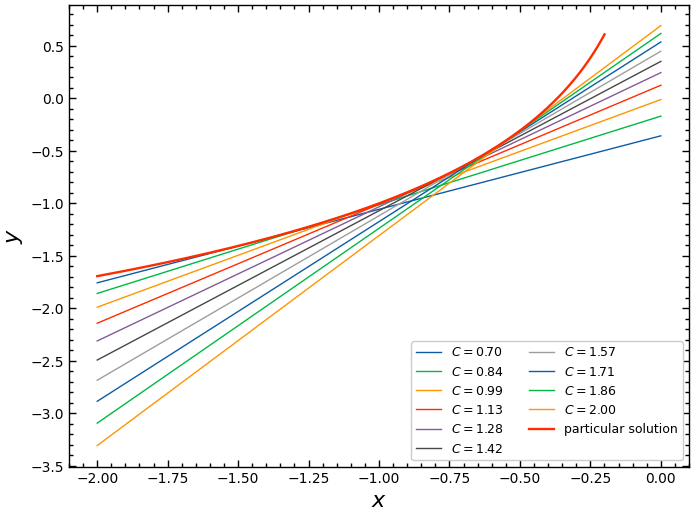

In [39]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','notebook','grid'])

def solve_clairaut(psi) -> tuple[tuple[smp.Eq, smp.Eq], smp.Eq]: 
    """
        Solves equation y = xy' + ψ(y')
        psi: function of p
    """
    C1, x = smp.symbols('C1 x')
    y = smp.symbols('y', cls=smp.Function)
    
    tangent_soln = smp.Eq(y(x), C1*x+psi.subs(p, C1))

    x = smp.symbols('x', cls=smp.Function)
    particular_soln = (smp.Eq(x(p), -psi.diff(p)), smp.Eq(y(p), -psi.diff(p)*p + psi))

    return particular_soln, tangent_soln

x,  p = smp.symbols('x p')
y = smp.Function('y')
psi = smp.Function('ψ')
psi = psi(p)

psi = smp.ln(p)

soln = solve_clairaut(psi)

print(soln)

tangents = soln[1].rhs
tan_lam = smp.lambdify([x, smp.Symbol('C1')], tangents)

part_x, part_y = soln[0][0].rhs, soln[0][1].rhs
part_x_lam, part_y_lam = smp.lambdify([p], part_x), smp.lambdify([p], part_y)

"""
    plt.plot interpolates inputs, so it's enough to provide 2 points to plot a line
"""
arg_list, param_list = np.linspace(-2, 0, 2), np.linspace(0.5, 5, 400)

part_x_vals, part_y_vals = part_x_lam(param_list), part_y_lam(param_list)

C_vals = np.linspace(0.7, 2, 10)
tangent_vals = [tan_lam(arg_list, c) for c in C_vals]
i=0
for tangent_val in tangent_vals:
    plt.plot(arg_list, tangent_val, linewidth=1.0, label=f'$C={C_vals[i]:.2f}$')
    i+=1

plt.plot(part_x_vals, part_y_vals, linewidth=1.7, label=f'particular solution')

plt.grid()
plt.tick_params(axis='both', labelsize=10, length=5)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(ncol=2, loc='lower right', fontsize=9)
